# 1) Create the following data and write to a csv file: Generate 10 random points in each of the the following circles (i) centre at (3,3) and radius 2, (ii) centre at (7,7) and radius 2 (iii) centre at (11,11) and radius 2.  Plot the data as well.                     (2 marks)



In [1]:
import random
import math

# radius of the circle
circle_r = 2
# center of the circle (x, y)
circle_x = 7
circle_y = 7
for i in range(10):
    # random angle
    alpha = 2 * math.pi * random.random()
    # random radius
    r = circle_r * (random.random())
    # calculating coordinates
    x = r * math.cos(alpha) + circle_x
    y = r * math.sin(alpha) + circle_y

    print(f"{i+1}th random point", (x, y))


1th random point (8.070919248873894, 7.295635046901579)
2th random point (7.938815669906186, 7.408001921439367)
3th random point (7.604702752438736, 6.496920001058353)
4th random point (5.639694399664535, 7.220671865102141)
5th random point (7.791250235633884, 7.695655286737001)
6th random point (7.117427928985396, 8.667170545824144)
7th random point (7.563858186326096, 8.794302251565139)
8th random point (5.759187492628944, 8.078749619571784)
9th random point (6.451296257949912, 7.140720495166654)
10th random point (7.190904511780959, 5.319983525779614)


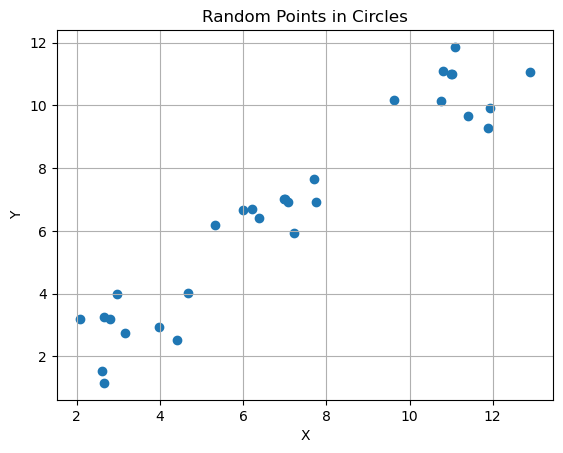

In [15]:
import csv
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define circle parameters
circle_data = [
    {'center': (3, 3), 'radius': 2},
    {'center': (7, 7), 'radius': 2},
    {'center': (11, 11), 'radius': 2}
]

# Function to generate random points in a circle
def generate_random_points(center, radius, num_points):
    points = []
    for _ in range(num_points):
        theta = random.uniform(0, 2 * np.pi)  # Random angle
        r = random.uniform(0, radius)  # Random radius within the circle
        x = center[0] + r * np.cos(theta)
        y = center[1] + r * np.sin(theta)
        points.append((x, y))
    return points

# Generate random points for each circle
all_points = []
for circle in circle_data:
    points = generate_random_points(circle['center'], circle['radius'], 10)
    all_points.extend(points)

# Write the points to a CSV file
with open('random_points.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x', 'y'])
    writer.writerows(all_points)

# Plot the points
x_coords, y_coords = zip(*all_points)
plt.scatter(x_coords, y_coords)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Points in Circles')
plt.grid(True)
plt.show()


In [16]:
df = pd.read_csv("random_points.csv")
df

,x,y
0,3.162229,2.728329
1,2.953131,3.998728
2,4.408875,2.528402
3,2.660712,1.149671
4,2.064129,3.188454
5,2.802423,3.190882
6,2.609412,1.532944
7,3.962863,2.930710
8,2.654963,3.254804
9,4.667483,4.007230


# 2)  Implement K - means clustering algorithm and for the above data, show the change in the centroid as well as the class assignments. Also, plot the cost function for K varying from 1 to 5. Show that the value of K matches with the intuition from the data. Plot the K-classes for the final K-value.      (8 marks)




In [17]:
data = df.values
data1 = data[:,0]
data2 = data[:,1]


In [20]:
# Defining the function for kmeans_clustering

def kmeans_clustering(data, k):
    # Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(1000):  # Maximum iterations
        # Calculate distances between each point and centroids
        distances = np.array([[np.linalg.norm(x - c) for c in centroids] for x in data])
#         print(distances)
        
        labels = np.argmin(distances, axis=1)  # Assign each point to the nearest centroid
#         print(labels)
        # Update centroids
        centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
#         print(centroids)

    # Calculate cost
    cost = np.mean([np.linalg.norm(centroids[labels[i]] - x) for i, x in enumerate(data)])

    return centroids, cost, labels


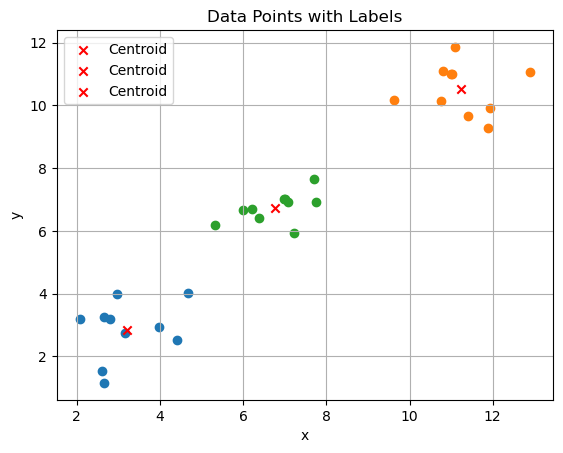

In [21]:
# number of clusters is k
k = 3
centroids, cost, labels = kmeans_clustering(data, 3)
# Plot data points with labels
for label in set(labels):
    indices = np.where(np.array(labels) == label)
    plt.scatter(data1[indices], data2[indices])
# Mark centroid point
plt.scatter(*centroids[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids[1], color='red', label='Centroid', marker='x')
plt.scatter(*centroids[2], color='red', label='Centroid', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

# number of clusters is 1

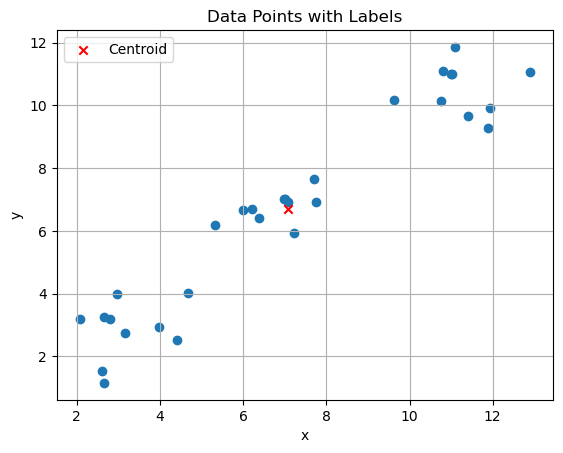

In [22]:
centroids1, cost1, labels1 = kmeans_clustering(data, 1)
# Plot data points with labels
for label in set(labels1):
    indices = np.where(np.array(labels1) == label)
    plt.scatter(data1[indices], data2[indices])
# Mark centroid point
plt.scatter(*centroids1[0], color='red', label='Centroid', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

# number of clusters is 2

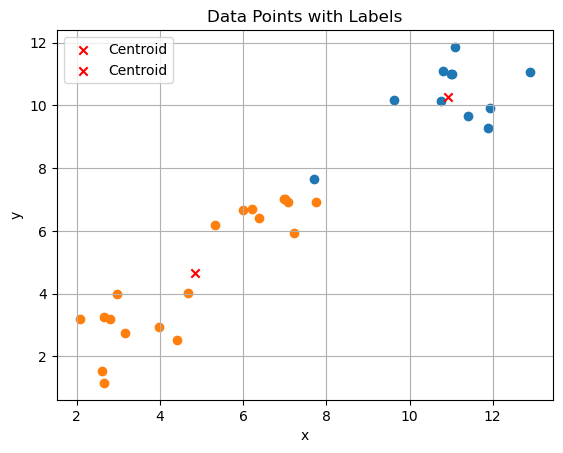

In [23]:
centroids2, cost2, labels2 = kmeans_clustering(data, 2)
# Plot data points with labels
for label in set(labels2):
    indices = np.where(np.array(labels2) == label)
    plt.scatter(data1[indices], data2[indices])
# Mark centroid point
plt.scatter(*centroids2[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids2[1], color='red', label='Centroid', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

# number of clusters is 4

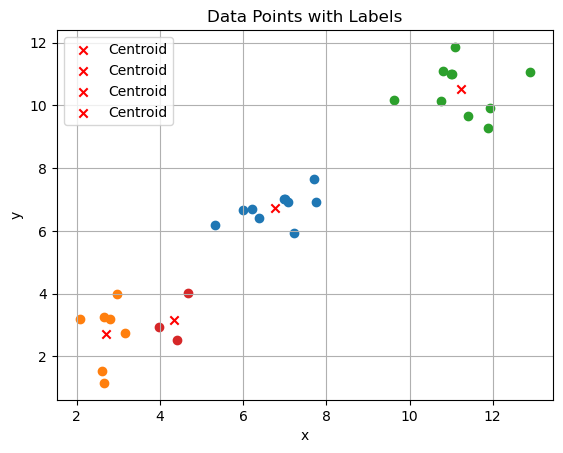

In [24]:
centroids4, cost4, labels4 = kmeans_clustering(data, 4)
# Plot data points with labels
for label in set(labels4):
    indices = np.where(np.array(labels4) == label)
    plt.scatter(data1[indices], data2[indices])
# Mark centroid point
plt.scatter(*centroids4[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids4[1], color='red', label='Centroid', marker='x')
plt.scatter(*centroids4[2], color='red', label='Centroid', marker='x')
plt.scatter(*centroids4[3], color='red', label='Centroid', marker='x')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

# number of clusters is 5

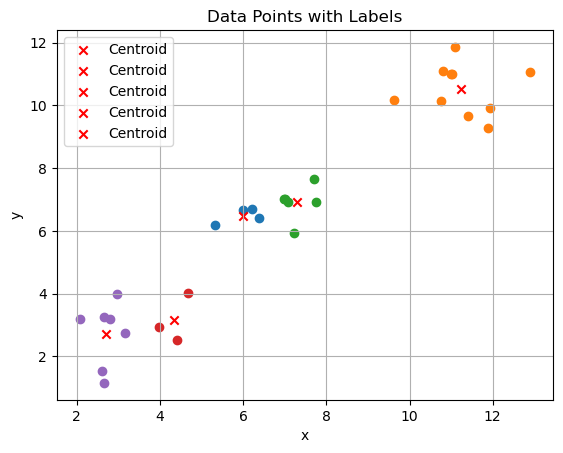

In [25]:
centroids5, cost5, labels5 = kmeans_clustering(data, 5)
# Plot data points with labels
for label in set(labels5):
    indices = np.where(np.array(labels5) == label)
    plt.scatter(data1[indices], data2[indices])
# Mark centroid point
plt.scatter(*centroids5[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids5[1], color='red', label='Centroid', marker='x')
plt.scatter(*centroids5[2], color='red', label='Centroid', marker='x')
plt.scatter(*centroids5[3], color='red', label='Centroid', marker='x')
plt.scatter(*centroids5[4], color='red', label='Centroid', marker='x')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()

# plotting the  number of cluster v/s cost  graph

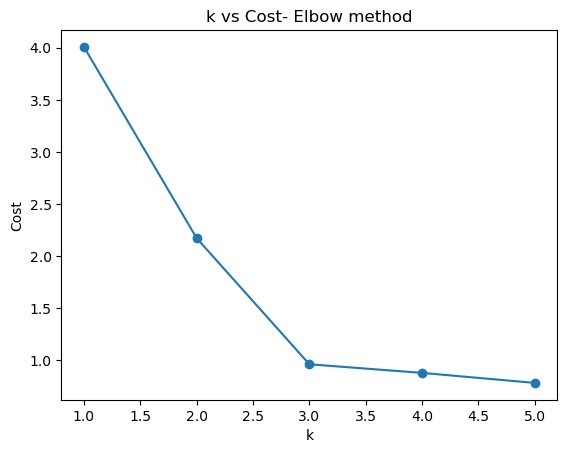

In [26]:

k = np.arange(1,6)
cost_list = [cost1, cost2, cost, cost4, cost5]
# Plot the line
plt.plot(k, cost_list, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('k vs Cost- Elbow method')
plt.show()

# So the best k value is 3

# number of clusters is 3

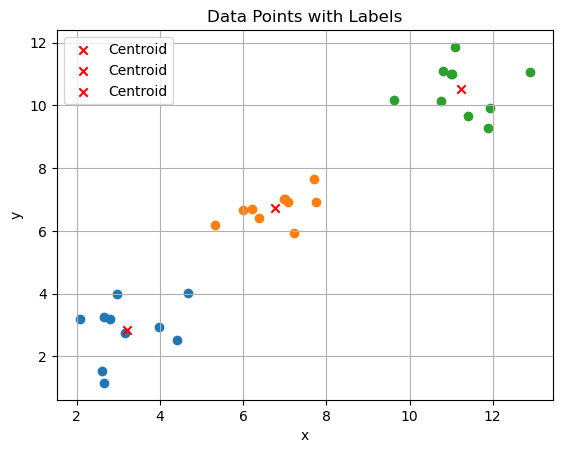

In [28]:

k = 3
centroids, cost, labels = kmeans_clustering(data, 3)
# Plot data points with labels
for label in set(labels):
    indices = np.where(np.array(labels) == label)
    plt.scatter(data1[indices], data2[indices])
# Mark centroid point
plt.scatter(*centroids[0], color='red', label='Centroid', marker='x')
plt.scatter(*centroids[1], color='red', label='Centroid', marker='x')
plt.scatter(*centroids[2], color='red', label='Centroid', marker='x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Data Points with Labels')
plt.legend()
plt.grid(True)
plt.show()